# Lab Exam 1B

In [179]:
from commonfunctions import *
from BassemFunctions import *
import numpy as np
from skimage import io, color
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Import all modules from LabsMethods folder
from LabsMethods.Morph import *
from LabsMethods.ContrastEnhancement import *
from LabsMethods.EdgeDetection import *
from LabsMethods.Segmentation import *
from LabsMethods.Segmentation2 import *
from LabsMethods.Smoothing import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Question 1


which issue should i solve first ?? and why

You should solve the Gaussian noise issue first before applying contrast enhancement. Here's why:

Noise Removal: Gaussian noise can obscure important details in the image. Removing noise first ensures that the subsequent contrast enhancement is applied to a cleaner image, which can improve the effectiveness of the contrast enhancement.

Contrast Enhancement: Enhancing contrast on a noisy image can amplify the noise, making it more prominent and potentially degrading the image quality. By removing the noise first, you ensure that the contrast enhancement improves the visibility of actual image features rather than the noise.

In [180]:
''' Question 1'''

# Read the image and load section
img_rgb = preprocess_image('Q1.png', 'rgb')

# Solving Issues section

# ISSUES #1 -> Noise (Grainy Texture)

    #Method -> Smoothing applying gaussian filter
# img_after_noise_removal1 = gaussian_filter(img_rgb, 5)

    #Method -> Smoothing applying median filter
img_after_median_filter= median_filter(img_rgb, 7)


# ISSUES #2 -> Contrast Enhancement 
    
        #Method -> Contrast Enhancement using histogram equalization
# img_after_contrast_enhancement1 = histogram_equalization(img_after_median_filter)
# # Show single histogram
# show_histogram(img_after_contrast_enhancement1, "Original Image")

        #Method -> Contrast Enhancement using Contrast limited adpatative histogram equalization CLAHE
#img_after_contrast_enhancement2 = clahe(img_after_median_filter)


# ISSUES #3 -> Overexposure (Excessive Brightness)  Adjust Brightness or exposure Color Cast
# Fix yellow tint and sharpen
def reduce_blue(image, factor=0.8):
    
    return  


img_after_median_filter[:, :, 2] = getImageWithHist(img_after_median_filter[:, :, 2])
img_after_median_filter[:, :, 1] = getImageWithHist(img_after_median_filter[:, :, 1])

img_fixed = getImageWithHist_color(img_after_median_filter, color='yellow')
# ISSUES #4 -> Sharpening for better details 

def gentle_sharpen_fast(image, radius=1.5, amount=0.5, threshold=5):
    """
    Fast gentle sharpening that preserves image quality.
    
    Args:
        image: Input image
        radius: Gaussian blur radius
        amount: Sharpening strength (0.3-0.7 recommended)
        threshold: Edge detection threshold
    """
    if is_rgb(image):
        # Process all channels at once using cv2
        # Convert to float32 for processing
        img_float = image.astype(np.float32)
        
        # Fast Gaussian blur using cv2
        blurred = cv2.GaussianBlur(img_float, (0, 0), radius)
        
        # Calculate unsharp mask
        mask = img_float - blurred
        
        # Fast edge detection using cv2
        edges = cv2.Sobel(img_float, cv2.CV_32F, 1, 1)
        edge_mask = np.sum(np.abs(edges), axis=2) > threshold
        
        # Broadcast edge mask to all channels
        edge_mask = np.repeat(edge_mask[:,:,np.newaxis], 3, axis=2)
        
        # Apply edge-aware sharpening
        mask = np.where(edge_mask, mask * 0.3, mask * amount)
        
        # Add mask to original image
        sharpened = img_float + mask
        
        return np.clip(sharpened, 0, 255).astype(np.uint8)
    
    # Grayscale processing
    img_float = image.astype(np.float32)
    blurred = cv2.GaussianBlur(img_float, (0, 0), radius)
    mask = img_float - blurred
    
    edges = np.abs(cv2.Sobel(img_float, cv2.CV_32F, 1, 1)) > threshold
    mask = np.where(edges, mask * 0.3, mask * amount)
    
    sharpened = img_float + mask
    return np.clip(sharpened, 0, 255).astype(np.uint8)
# Update your code to:
img_sharpened = gentle_sharpen_fast(img_fixed, 
                              radius=1,  # Gentler blur
                              amount=5,   # Subtle sharpening
                              threshold=5) # Edge preservation


# show images and outputs section
show_images([img_rgb,img_after_median_filter,img_fixed], ['original','img_after_median_filter','after contrast enhancement'])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

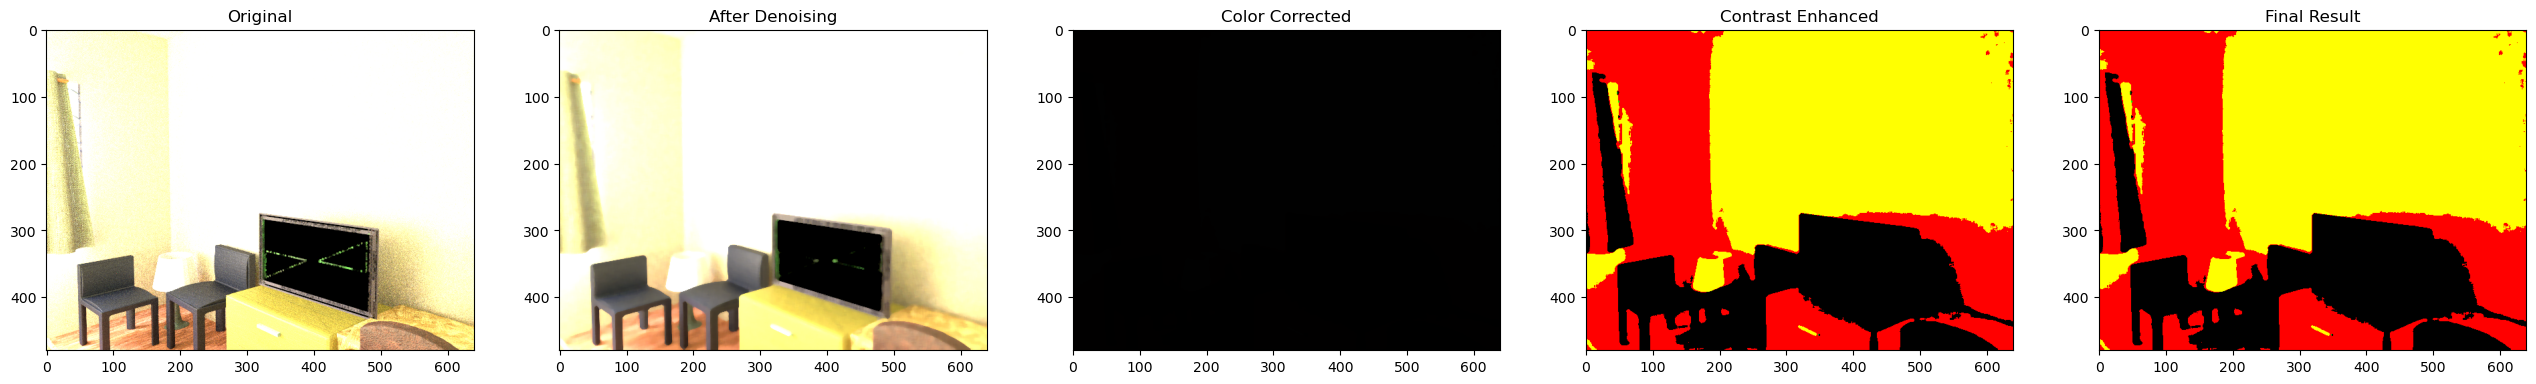

In [ ]:
# ISSUES #1 -> Remove noise first
img_after_median_filter = median_filter(img_rgb, 7)

# ISSUES #2 -> Fix color cast using HSV adjustment
img_color_fixed = adjust_hsv(img_after_median_filter, 
                           hue_shift=-5,  # Reduce yellow
                           sat_scale=0.9)  # Slightly reduce saturation

# ISSUES #3 -> Apply contrast enhancement
# Use getImageWithHist_color instead of individual channel processing
img_contrast_fixed = getImageWithHist_color(img_color_fixed, color='yellow')

# ISSUES #4 -> Apply gentle sharpening last
img_final = gentle_sharpen_fast(img_contrast_fixed, 
                              radius=1.5,
                              amount=0.4,
                              threshold=10)

# Show results
show_images([img_rgb, 
            img_after_median_filter,
            img_color_fixed,
            img_contrast_fixed,
            img_final], 
            ['Original',
             'After Denoising',
             'Color Corrected',
             'Contrast Enhanced',
             'Final Result'])

### Question 2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


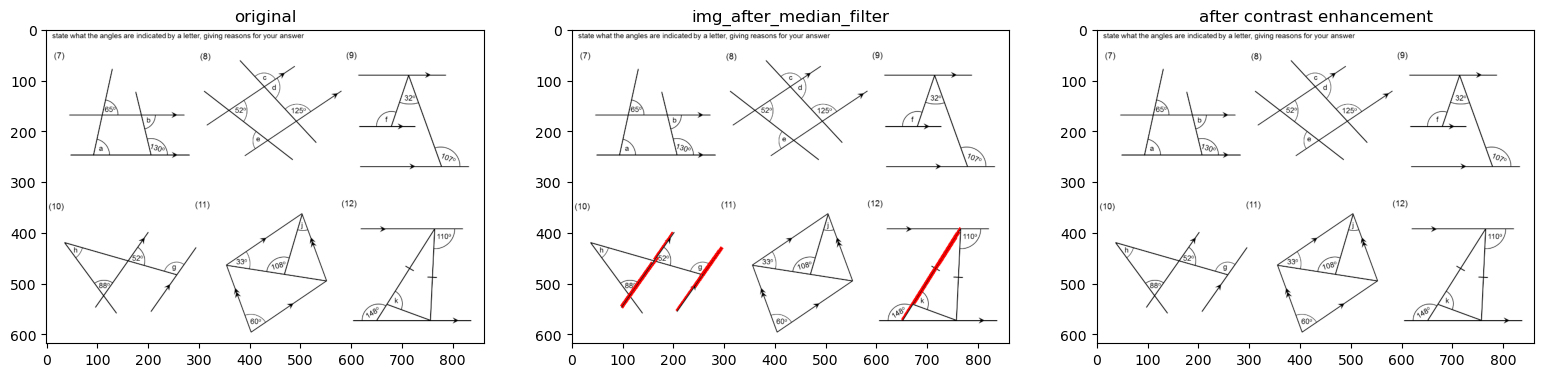

In [ ]:
''' Question 1'''

# Read the image and load section
img_rgb = preprocess_image('Q2.png', 'rgb')

# Solving Issues section

img_rgb1 =detect_and_highlight_lines_skimage(img_rgb)

# show images and outputs section
show_images([img_rgb,img_rgb1,img_rgb], ['original','img_after_median_filter','after contrast enhancement'])

### Question 3

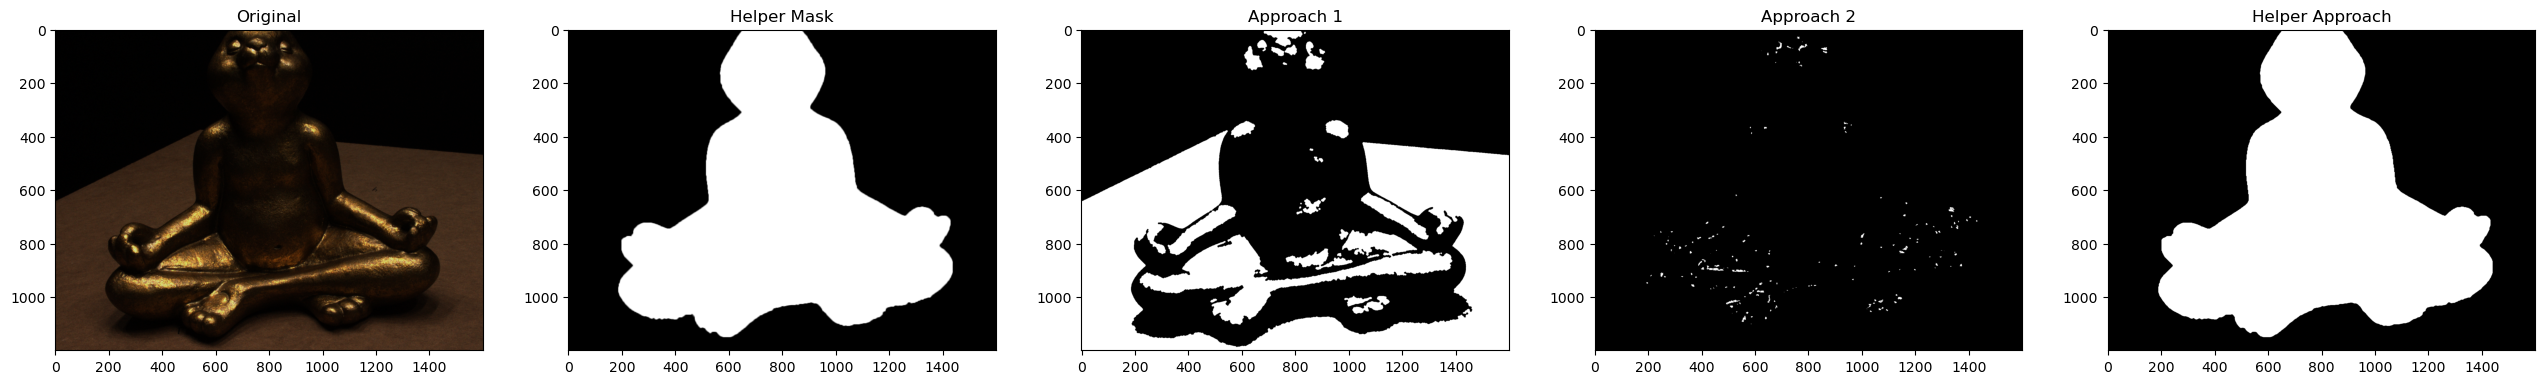

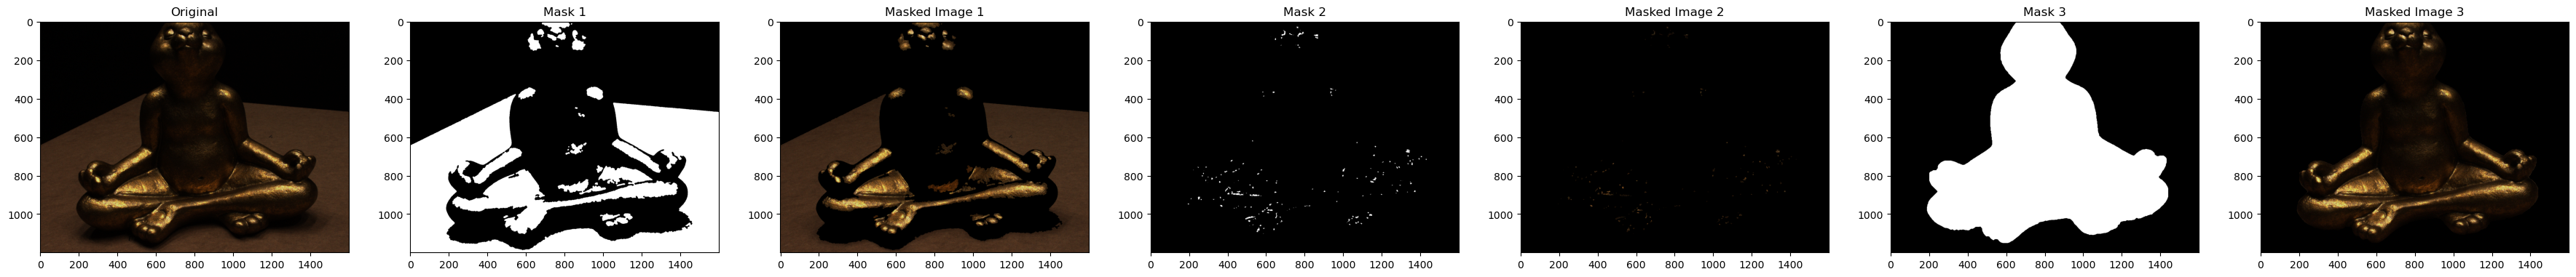

In [182]:
def get_minimal_mask_with_helper(image, helper_mask):
    """
    Get minimal mask using helper mask as reference.
    """
    # Normalize both images
    image = normalize_image_range(image)
    helper_mask = normalize_image_range(helper_mask)
    
    # Convert to grayscale if RGB
    if len(image.shape) == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    else:
        gray = image.copy()
        
    # Threshold helper mask to binary
    _, helper_binary = cv2.threshold(helper_mask, 127, 255, cv2.THRESH_BINARY)
    
    # Get contours from helper mask
    contours, _ = cv2.findContours(helper_binary, cv2.RETR_EXTERNAL, 
                                 cv2.CHAIN_APPROX_SIMPLE)
    
    # Find largest contour (bunny)
    max_contour = max(contours, key=cv2.contourArea)
    
    # Create minimal mask
    minimal_mask = np.zeros_like(gray)
    cv2.drawContours(minimal_mask, [max_contour], -1, 255, -1)
    
    # Refine mask using morphological operations
    kernel = np.ones((3,3), np.uint8)
    minimal_mask = cv2.morphologyEx(minimal_mask, cv2.MORPH_CLOSE, kernel)
    
    return minimal_mask

def get_minimal_mask_approach1(image):
    """
    First approach using Otsu thresholding and morphological operations.
    """
    # Normalize image
    image = normalize_image_range(image)
    
    # Convert to grayscale if RGB
    if len(image.shape) == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    else:
        gray = image.copy()
    
    # Apply Otsu's thresholding
    thresh = threshold_otsu(gray)
    binary = (gray > thresh).astype(np.uint8) * 255
    
    # Apply morphological operations
    selem = disk(3)
    mask = closing(binary, selem)  # Close small holes
    mask = opening(mask, selem)    # Remove small objects
    
    # Fill holes
    mask = ndimage.binary_fill_holes(mask).astype(np.uint8) * 255
    
    return mask

def get_minimal_mask_approach2(image):
    """
    Second approach using watershed segmentation.
    """
    # Normalize and convert image depth
    if image.dtype == np.float64 or image.dtype == np.float32:
        image = (image * 255).astype(np.uint8)
    else:
        image = image.astype(np.uint8)
    # Convert to grayscale if RGB
    if len(image.shape) == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    else:
        gray = image.copy()
    
    # Apply adaptive thresholding
    binary = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                 cv2.THRESH_BINARY_INV, 11, 2)
    
    # Noise removal
    kernel = np.ones((3,3), np.uint8)
    binary = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)
    
    # Sure background
    sure_bg = cv2.dilate(binary, kernel, iterations=3)
    
    # Finding sure foreground
    dist_transform = cv2.distanceTransform(binary, cv2.DIST_L2, 5)
    ret, sure_fg = cv2.threshold(dist_transform, 0.5*dist_transform.max(), 255, 0)
    
    # Finding unknown region
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg, sure_fg)
    
    # Marker labelling
    ret, markers = cv2.connectedComponents(sure_fg)
    markers = markers + 1
    markers[unknown==255] = 0
    
    # Apply watershed
    markers = cv2.watershed(cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR), markers)
    mask = np.zeros_like(gray)
    mask[markers > 1] = 255
    
    return mask

# Read images
img = preprocess_image('Q3.png', 'rgb')
helper_mask = preprocess_image('Q3-Explain.png', 'grayscale')

# Get masks using all approaches
mask1 = get_minimal_mask_approach1(img)
mask2 = get_minimal_mask_approach2(img)
mask3 = get_minimal_mask_with_helper(img, helper_mask)

# Show results
show_images([img, helper_mask, mask1, mask2, mask3], 
           ['Original', 'Helper Mask', 'Approach 1', 'Approach 2', 'Helper Approach'])

def apply_mask(image, mask):
    """
    Apply a binary mask to an image.
    
    Parameters:
        image (numpy.ndarray): The original image.
        mask (numpy.ndarray): The binary mask to apply (should be 0 or 255).
    
    Returns:
        numpy.ndarray: The masked image.
    """
    # Ensure mask is binary (0 or 255)
    mask = (mask > 0).astype(np.uint8) * 255

    # If image is RGB, keep it RGB
    if len(image.shape) == 3:
        masked_image = cv2.bitwise_and(image, image, mask=mask)
    else:
        # For grayscale images
        masked_image = cv2.bitwise_and(image, mask)
    
    return masked_image

# Example usage:

# Apply masks to the image
masked_image1 = apply_mask(img, mask1)
masked_image2 = apply_mask(img, mask2)
masked_image3 = apply_mask(img, mask3)

# Show results
show_images(
    [img, mask1, masked_image1, mask2, masked_image2, mask3, masked_image3],
    [
        "Original", 
        "Mask 1", "Masked Image 1", 
        "Mask 2", "Masked Image 2", 
        "Mask 3", "Masked Image 3"
    ]
)


### Question 4

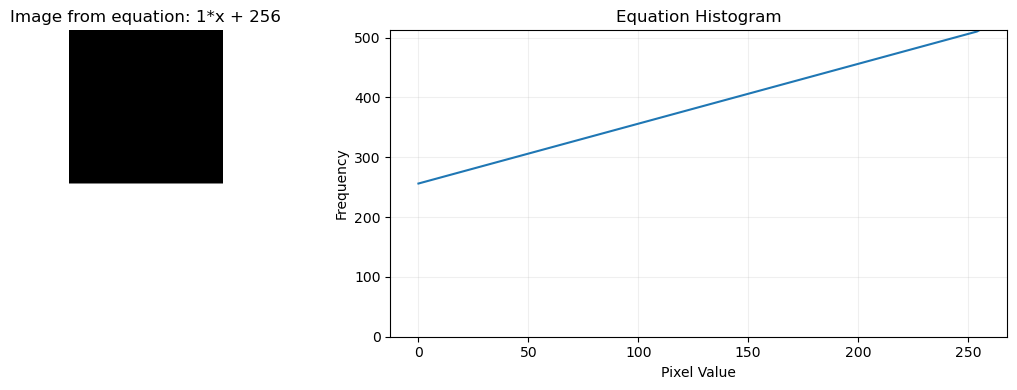

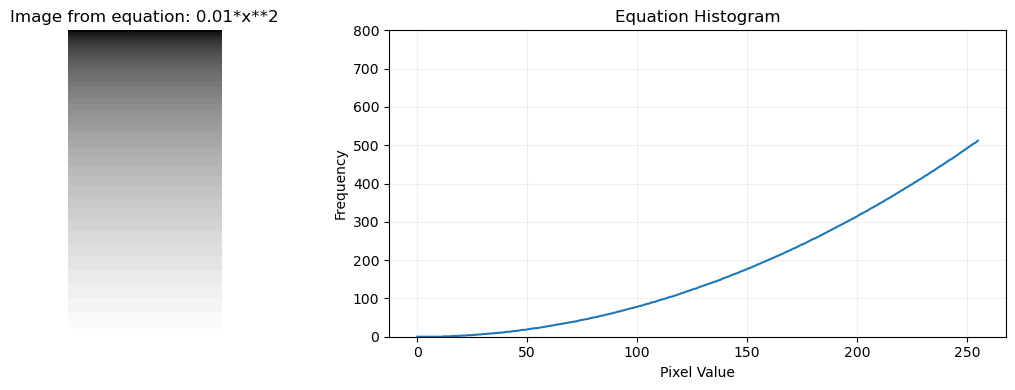

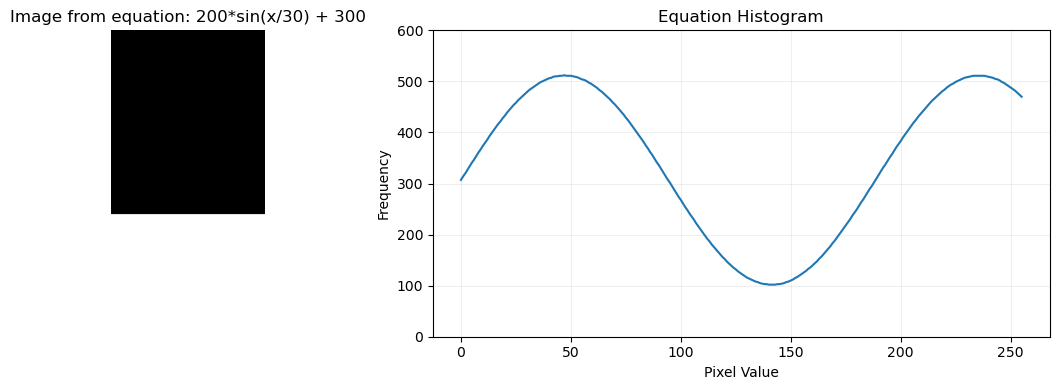

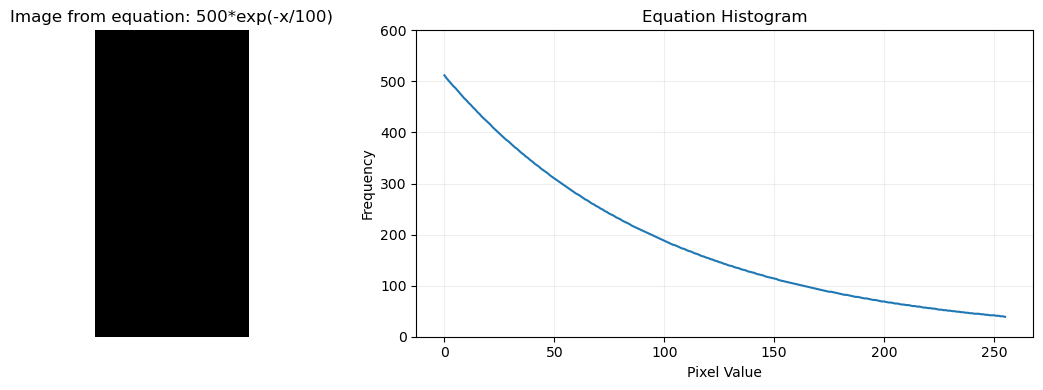

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy.parsing.sympy_parser import parse_expr
import cv2

def create_equation_histogram(equation_str, width=256, height=512, y_max=None):
    """
    Create histogram and image from mathematical equation.
    
    Args:
        equation_str: String equation in terms of x (e.g., '2*x + 1', 'x**2')
        width: Image width
        height: Image height
        y_max: Maximum y-axis value for histogram
    """
    # Convert string equation to symbolic expression
    x = sp.Symbol('x')
    expr = parse_expr(equation_str)
    
    # Create x values and evaluate equation
    x_vals = np.linspace(0, 255, 256)
    equation_func = sp.lambdify(x, expr, 'numpy')
    y_vals = equation_func(x_vals)
    
    # Normalize y values to fit height
    y_vals = np.clip(y_vals, 0, None)  # Remove negative values
    y_vals = (y_vals / y_vals.max() * height).astype(int)
    
    # Create image
    image = np.zeros((height, width), dtype=np.uint8)
    current_row = 0
    
    for intensity, count in enumerate(y_vals):
        count = int(count)
        if current_row + count > height:
            count = height - current_row
        if count > 0:
            image[current_row:current_row+count, :] = intensity
            current_row += count
    
    # Plot results
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    # Show image
    ax1.imshow(image, cmap='gray')
    ax1.set_title(f'Image from equation: {equation_str}')
    ax1.axis('off')
    
    # Show histogram
    histogram = np.histogram(image.ravel(), bins=256, range=(0, 256))[0]
    ax2.plot(x_vals, y_vals)
    ax2.set_title('Equation Histogram')
    ax2.set_xlabel('Pixel Value')
    ax2.set_ylabel('Frequency')
    ax2.grid(True, alpha=0.2)
    
    if y_max is not None:
        ax2.set_ylim(0, y_max)
    
    plt.tight_layout()
    plt.show()
    
    return image

# Test with different equations
linear_img = create_equation_histogram('1*x + 256', y_max=512)
quadratic_img = create_equation_histogram('0.01*x**2', y_max=800)
sine_img = create_equation_histogram('200*sin(x/30) + 300', y_max=600)
exp_img = create_equation_histogram('500*exp(-x/100)', y_max=600)